In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline
pd.set_option('float_format', '{:f}'.format)


# Read in cleaned data
df = pd.read_csv('../../mod-2-project/data/kc_house_data_2.csv', index_col=0)

In [65]:
df.isnull().sum().sum()

0

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4580474287.770987,540296.573506,3.373200,2.115826,2080.321850,15099.408760,1.494096,0.006760,0.233863,3.409825,7.657915,1788.596842,291.725008,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2876735715.747780,367368.140101,0.926299,0.768984,918.106125,41412.636876,0.539683,0.081944,0.765686,0.650546,1.173200,827.759761,442.667800,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1000102.000000,78000.000000,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2123049175.000000,322000.000000,3.000000,1.750000,1430.000000,5040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3904930410.000000,450000.000000,3.000000,2.250000,1910.000000,7618.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7308900490.000000,645000.000000,4.000000,2.500000,2550.000000,10685.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9900000190.000000,7700000.000000,33.000000,8.000000,13540.000000,1651359.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a351aa7d0>,
      dtype=object)

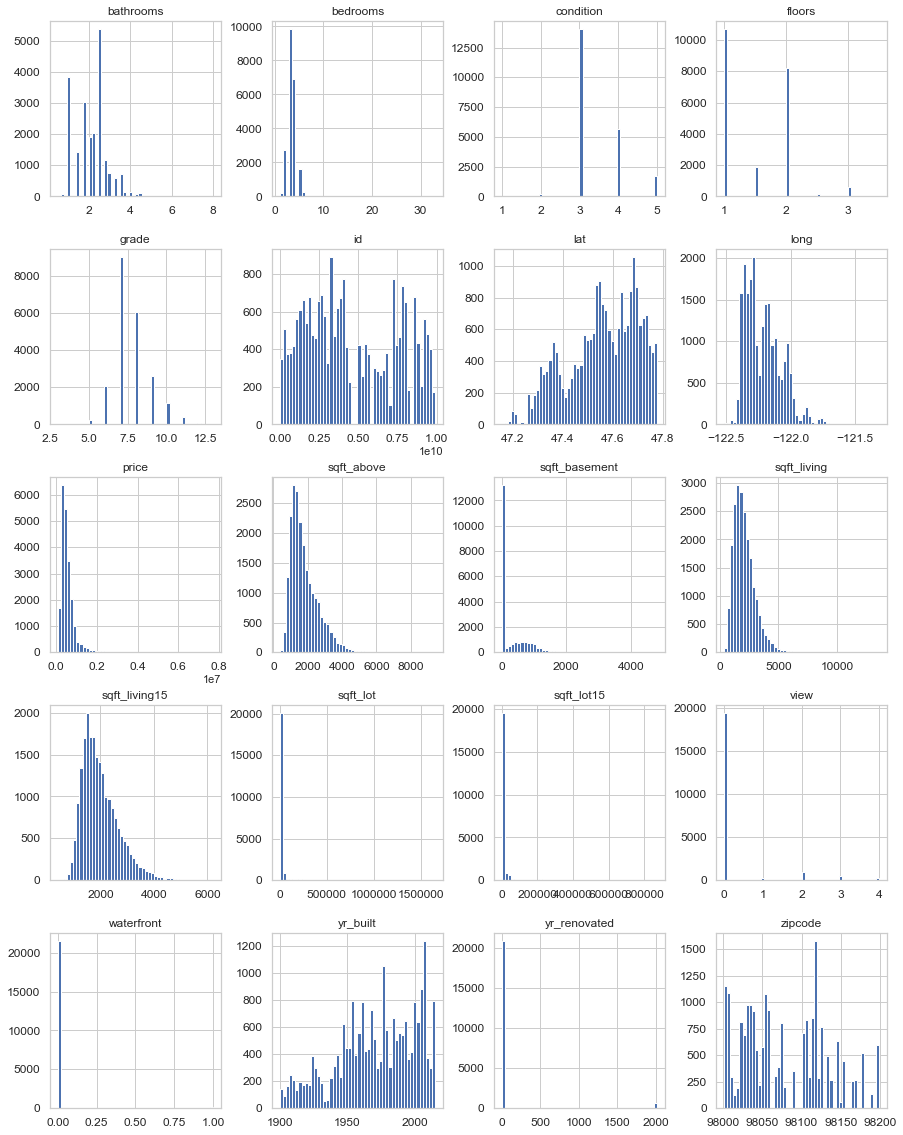

In [53]:
#df.hist(, bins=50, xlabelsize=8, ylabelsize=8)

df.hist(bins = 50, xlabelsize=12, ylabelsize=12, figsize = [15, 20])

In [6]:
print(df["price"].describe().apply(lambda x: format(x, 'f')))

count      21597.000000
mean      540296.573506
std       367368.140101
min        78000.000000
25%       322000.000000
50%       450000.000000
75%       645000.000000
max      7700000.000000
Name: price, dtype: object


In [7]:
df["price"].median()

450000.0

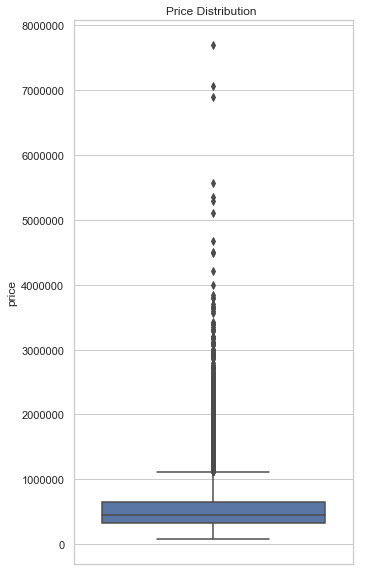

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 10))
ax = sns.boxplot(y=df["price"],showfliers=True)
plt.title("Price Distribution ")
ax 


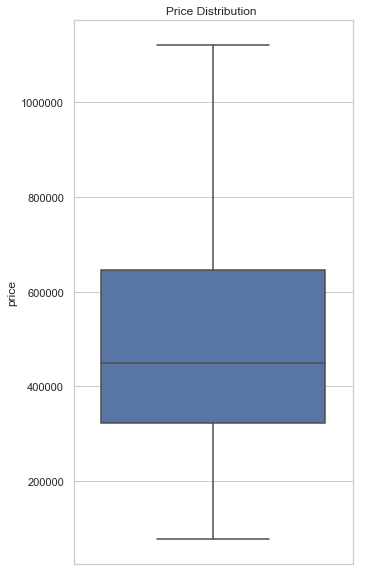

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 10))
ax = sns.boxplot(y=df["price"],showfliers=False)
plt.title("Price Distribution ")
ax 

In [10]:
q99 = df.price.quantile(.99)
pq99 = df[df['price'] < q99]

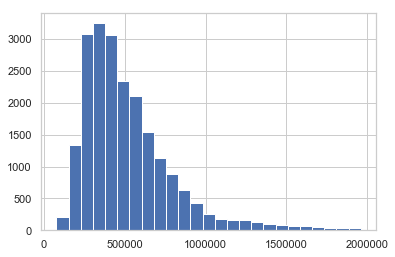

In [97]:
pq99.price.hist(bins=25,grid=True)
plt.locator_params(axis='x', nbins=6)


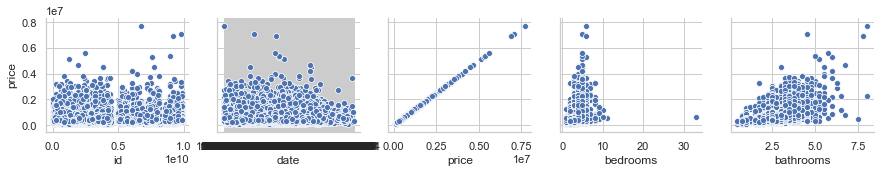

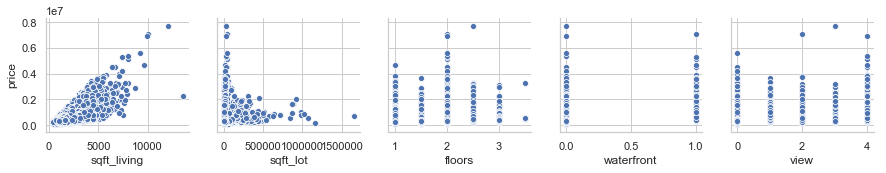

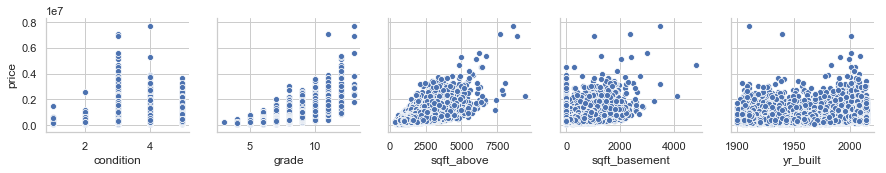

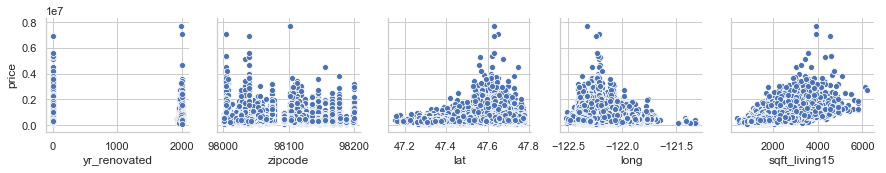

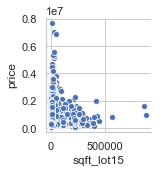

In [35]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=['price'])

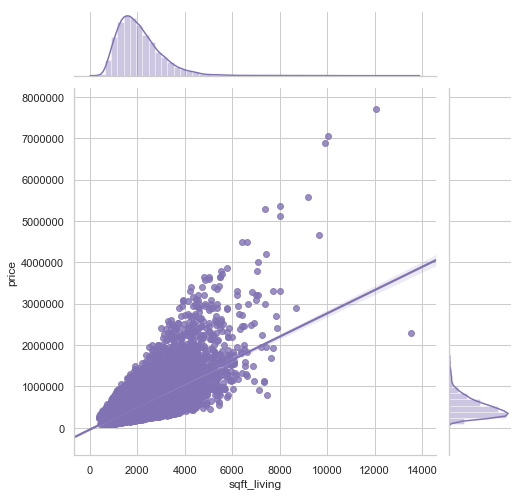

In [60]:
g = sns.jointplot("sqft_living", "price", data=df,
                  kind="reg", truncate=False,
                  color="m", height=7)

In [14]:
corr_price = df.corr()['price']
price_corr_high = corr_price[abs(corr_price) > 0.5].sort_values(ascending=False)

In [18]:
plot_corr = list(price_corr_high.index)[1:]

In [19]:
plot_corr

['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']

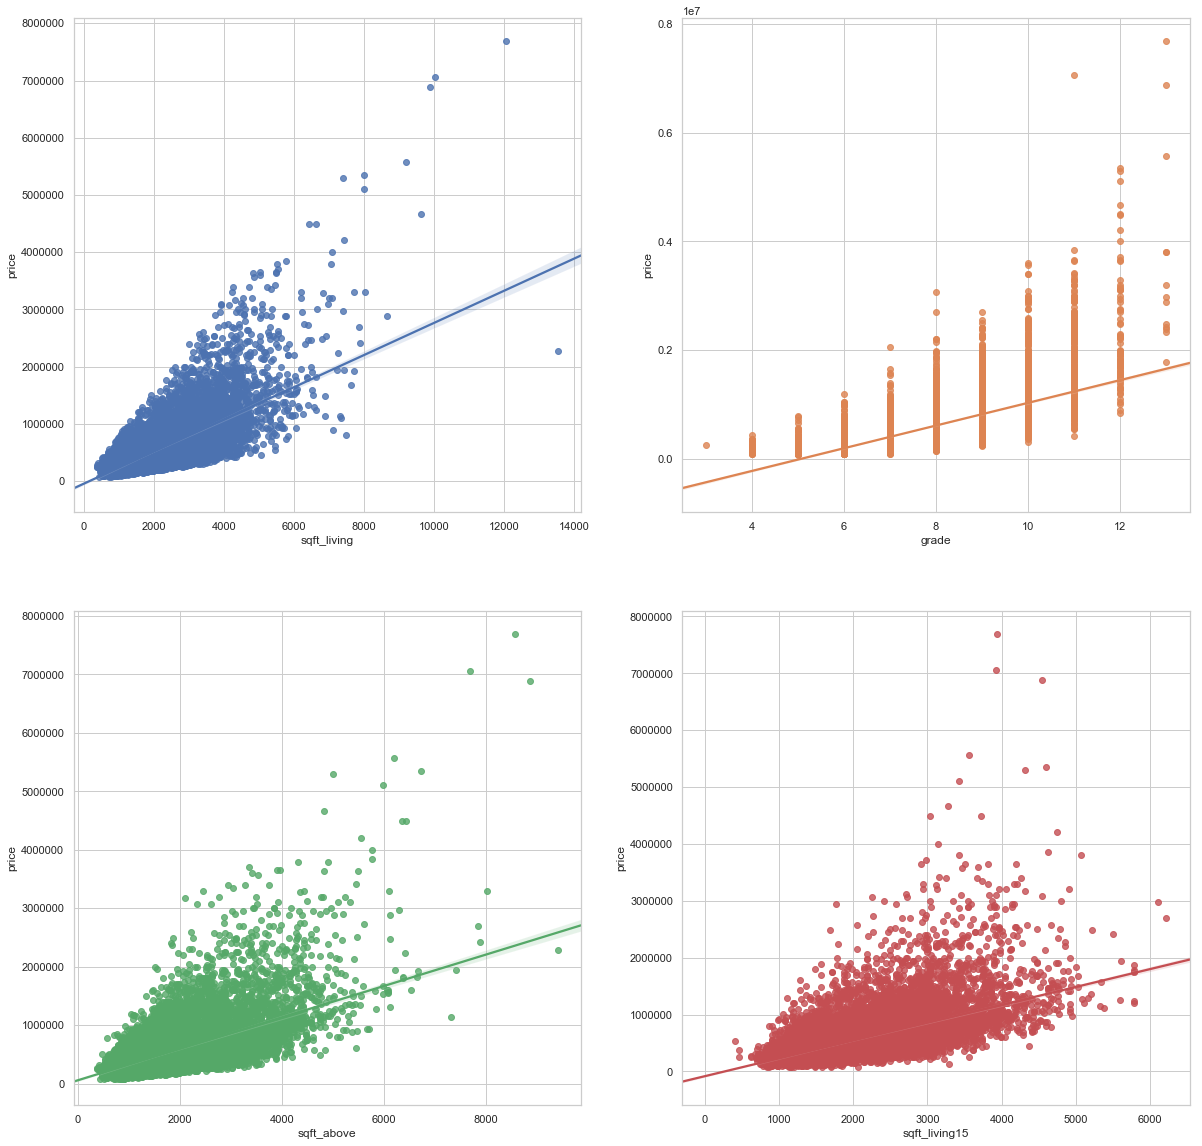

In [30]:
fig, ax = plt.subplots(2, 2, figsize = (20,20))

for i, ax in enumerate(fig.axes):
    sns.regplot(x=plot_corr[i], y='price', data=df, ax=ax)

In [54]:
df.isnull().sum().sum()

63